<a href="https://colab.research.google.com/github/JOHN-MURITU/supermarket-data-analysis/blob/main/Supermarket_sales_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supermarket Sales Data Analysis

This notebook presents a detailed step-by-step analysis of the Supermarket Sales dataset using Python's Pandas and visualization libraries.

---

## Step 1: Importing Libraries and Loading Data

We start by importing necessary libraries and loading the dataset.



In [3]:
# Download the dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("faresashraf1001/supermarket-sales")

print("Path to dataset files:", path)

100%|██████████| 36.5k/36.5k [00:00<00:00, 32.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/faresashraf1001/supermarket-sales/versions/2


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

#Load the data
dataset_dir = '/root/.cache/kagglehub/datasets/faresashraf1001/supermarket-sales/versions/2'
csv_files = glob.glob(f'{dataset_dir}/*.csv')

if len(csv_files) > 0:
    data_path = csv_files[0] # Assuming there is only one CSV file
    data = pd.read_csv(data_path)

    #Show first few rows and data information
    print(data.head())
    print(data.info())
else:
    print(f"No CSV files found in the directory: {dataset_dir}")

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

          Time      Payment    cogs  gross margin percentage  gross income  \
0   1:08:00 PM      Ewallet  522.83                 4.761905       26.1415   
1  10:29


---

## Step 2: Data Cleaning

Check for missing values and duplicates to ensure the data quality before analysis.



In [7]:
print(data.isnull().sum())  # Check missing values
data = data.drop_duplicates()  # Remove duplicates
print(data.info())  # Verify after cleaning



Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Produ


---

## Step 3: Basic Statistical Summary

Generate descriptive statistics and examine key metrics.



In [8]:
print(data.describe())
mean_gross_income = data['gross income'].mean()
print(f"Average Gross Income: {mean_gross_income:.2f}")



        Unit price     Quantity       Tax 5%        Sales        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875   


---

## Step 4: Branch-wise Sales Analysis

Analyze total and average gross income by branch and find the best performing branch.



In [9]:
branch_sales = data.groupby('Branch')['gross income'].sum()
print("Total Gross Income by Branch:\n", branch_sales)

branch_mean = data.groupby('Branch')['gross income'].mean()
print("Mean Gross Income by Branch:\n", branch_mean)

best_branch = branch_mean.idxmax()
print(f"The best performing branch is: {best_branch}")



Total Gross Income by Branch:
 Branch
Alex     5057.1605
Cairo    5057.0320
Giza     5265.1765
Name: gross income, dtype: float64
Mean Gross Income by Branch:
 Branch
Alex     14.874001
Cairo    15.232024
Giza     16.052367
Name: gross income, dtype: float64
The best performing branch is: Giza



---

## Step 5: Category-wise Sales Analysis

Analyze sales across various product lines.



In [10]:
category_sales = data.groupby('Product line')['gross income'].sum().sort_values(ascending=False)
print("Gross Income by Product Line:\n", category_sales)

top_categories = category_sales.head(3)
print("Top 3 Product Lines:\n", top_categories)



Gross Income by Product Line:
 Product line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Home and lifestyle        2564.8530
Health and beauty         2342.5590
Name: gross income, dtype: float64
Top 3 Product Lines:
 Product line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Name: gross income, dtype: float64



---

## Step 6: Customer and City Analysis

Study sales variation by customer type and city.



In [11]:
customer_type_sales = data.groupby('Customer type')['gross income'].sum()
print("Gross Income by Customer Type:\n", customer_type_sales)

city_sales = data.groupby('City')['gross income'].sum()
print("Gross Income by City:\n", city_sales)



Gross Income by Customer Type:
 Customer type
Member    9033.084
Normal    6346.285
Name: gross income, dtype: float64
Gross Income by City:
 City
Mandalay     5057.0320
Naypyitaw    5265.1765
Yangon       5057.1605
Name: gross income, dtype: float64



---

## Step 7: Visualizing Sales Data

Create bar plots for gross income by branch and top product categories.



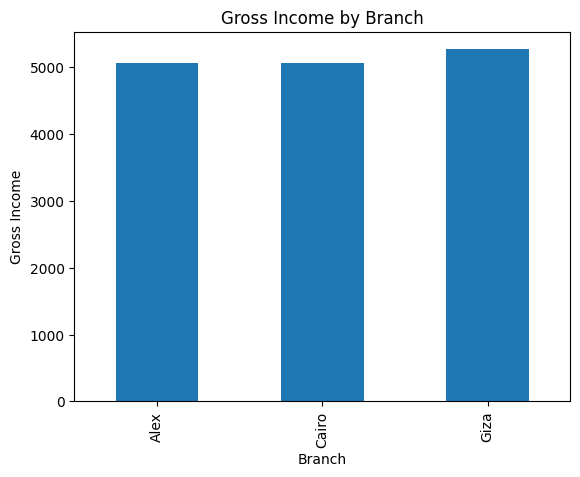

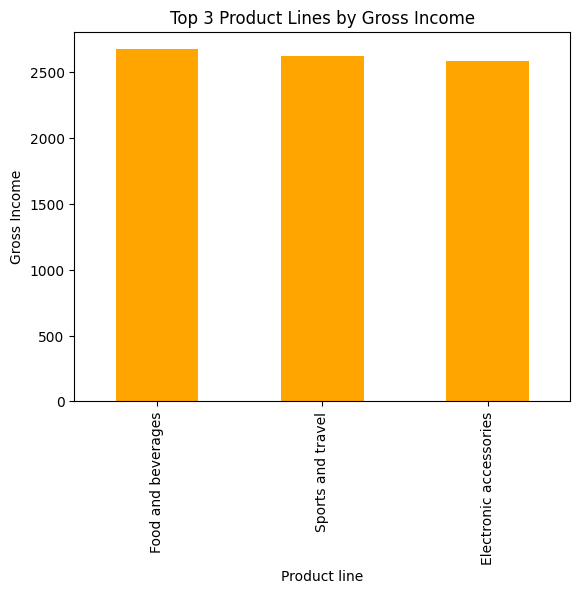

In [12]:
branch_sales.plot(kind='bar', title='Gross Income by Branch')
plt.ylabel('Gross Income')
plt.show()

top_categories.plot(kind='bar', color='orange', title='Top 3 Product Lines by Gross Income')
plt.ylabel('Gross Income')
plt.show()



#The chart displays the gross income for three branches: Alex, Cairo, and Giza.

#Dominant Branch:
 The Giza branch generated the highest gross income, with the bar visibly taller than the other two, slightly exceeding the 5000 unit mark on the Y-axis. This branch is the top performer in terms of raw income.

#Strong, Similar Performance:
The Alex and Cairo branches have nearly identical gross income figures, both registering exactly at the 5000 unit mark. Their performance is highly consistent and significantly close to the top-performing Giza branch.

#Key Observations and Implications

#High-Level Parity:
 The most striking feature is the relatively narrow range of gross income across all three branches. All branches are performing at a very high and comparable level, with incomes hovering around the 5,000 unit mark. The difference between the highest (Giza) and the lowest (Alex/Cairo) is marginal in the context of the total income (i.e., less than a few percentage points).

#Performance Stability:
 The close incomes suggest a stable and consistent operational model across the branches. There isn't a single outlier branch drastically underperforming or overperforming, which indicates strong system-wide execution.

#Revenue Generation Concentration:
The data shows that revenue generation is well-distributed, not overly reliant on one branch. This reduces business risk since a downturn in one market won't severely impact the overall gross income.


---

## Step 8: Advanced Visualizations with Seaborn

Visualize distributions, boxplots, and relationships between variables.



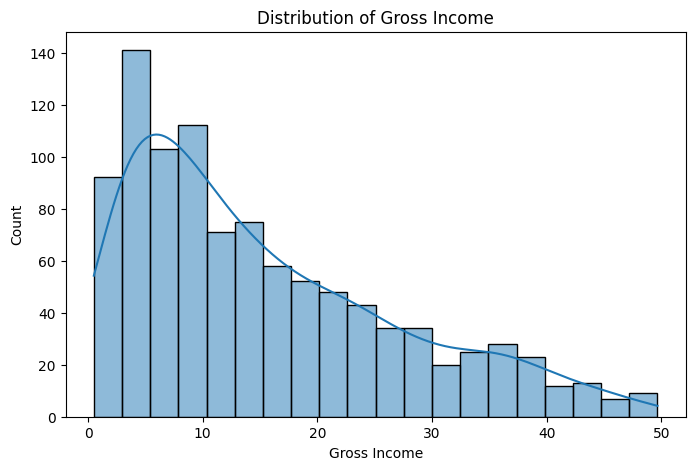

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(data['gross income'], bins=20, kde=True)
plt.title('Distribution of Gross Income')
plt.xlabel('Gross Income')
plt.show()





Based on the histogram titled"Distribution of Gross Income"(which includes a Kernel Density Estimate or KDE curve), here are the key insights and analytical observations
#Distribution Shape and Central Tendency
#Positive Skewness (Right-Skewed):
The distribution is clearly right-skewed (or positively skewed). The majority of the data points (the tallest bars) are clustered on the left side (lower income values), and the 'tail' of the distribution stretches out to the right towards higher income values.
#Mode and Typical Income:

The highest bar (the mode) is located in the $\mathbf{5 \text{ to } 10}$ range of Gross Income, with a count of over 140. This suggests that the most frequent gross income amount is relatively low. A secondary, slightly lower mode also appears around the $\mathbf{0 \text{ to } 5}$ range
#Median vs. Mean:
  Due to the positive skew, we can infer that the mean (average) gross income will be greater than the median (middle value). The high-income outliers in the right tail pull the mean upward.
  
#Dispersion and OutliersIncome Concentration:
   The vast majority of transactions or observations (as represented by the 'Count' on the y-axis) have a gross income less than 20. Beyond this point, the frequency drops off rapidly.
   
#High-Income Rarity:
  While the distribution extends up to $\mathbf{50}$, the count of observations with a gross income over $\mathbf{30}$ is very low (less than 30 for each bin). The highest incomes are rare events or 'outliers' that contribute disproportionately to the total revenue.

#Business Implications
#Volume vs. Value Strategy:
  The business is primarily driven by a high volume of low-value transactions (the tall bars on the left). The higher total gross income is generated by a small number of high-value transactions (the long tail on the right).
#Focus Area:
   Any strategy to increase the overall gross income should focus on two main areas:
#Boosting Volume:
 Slightly increasing the value of the most frequent low-income transactions (the peak around 5-10).
#Maximizing Value:
  Understanding the factors that drive the rare, high-income transactions (e.g., specific products, customer segments, or services) and trying to replicate them.
#Risk Management:
  The business is less sensitive to the loss of a single high-value customer, as most of its observations (volume) are in the lower-income brackets.

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Branch', y='gross income', data=data)
plt.title('Gross Income Distribution by Branch')
plt.show()

# Step 9: Correlation Analysis

In [14]:

 #One Hot Encoding
data_encoded = pd.get_dummies(data)
corr = data_encoded.corr()
print("Correlation matrix:\n", corr)


Correlation matrix:
                      Unit price  Quantity    Tax 5%     Sales      cogs  \
Unit price             1.000000  0.010778  0.633962  0.633962  0.633962   
Quantity               0.010778  1.000000  0.705510  0.705510  0.705510   
Tax 5%                 0.633962  0.705510  1.000000  1.000000  1.000000   
Sales                  0.633962  0.705510  1.000000  1.000000  1.000000   
cogs                   0.633962  0.705510  1.000000  1.000000  1.000000   
...                         ...       ...       ...       ...       ...   
Time_8:57:00 PM       -0.032607 -0.005522 -0.022397 -0.022397 -0.022397   
Time_8:59:00 PM        0.000580 -0.023134 -0.021657 -0.021657 -0.021657   
Payment_Cash           0.029721  0.000403  0.009474  0.009474  0.009474   
Payment_Credit card   -0.032415  0.006203  0.002852  0.002852  0.002852   
Payment_Ewallet        0.001865 -0.006443 -0.012244 -0.012244 -0.012244   

                     gross margin percentage  gross income    Rating  \
Unit p

This correlation matrix provides insight into the relationships between various sales variables. Here are the key insights derived from the table:
#1. Strong Dependencies Among Financial Metrics (Multicollinearity)
There are near-perfect positive correlations (close to $+1.0$) between the calculated financial variables.
#Tax 5%, Sales, and cogs (Cost of Goods Sold)
 all show a $\mathbf{1.000000}$ correlation with each other. This is expected and likely indicates that they are all directly calculated from the Unit Price and Quantity in the same transaction.
#Implication:
  For modeling purposes (like regression), these variables are redundant (exhibit multicollinearity). You should only use one of them (e.g., Sales) as a predictor or target, as including all three adds no new information and can destabilize the model.
#2. Primary Drivers of Sales/Tax/COGS
  The financial output variables (Tax 5%, Sales, cogs) are driven by the two input variables (Unit price and Quantity), as expected.
#Quantity is the Stronger Driver:
   The correlation between Quantity and Sales/Tax/COGS is $\mathbf{0.705510}$, which is a strong positive relationship.
#Unit Price is Also a Strong Driver:

   The correlation between Unit price and Sales/Tax/COGS is $\mathbf{0.633962}$, which is also a moderately strong positive relationship.
#Interpretation:
    Both the number of items sold (Quantity) and the price of the items (Unit price) are significant factors contributing to total Sales, Tax, and COGS, with Quantity having a slightly greater linear association in this dataset.
#3. Relationships with Rating and Time
  The continuous variables show very little correlation with the categorical or time-related variables.
#Rating vs. Financials:
  The correlation between Rating and Sales/Tax/COGS ($\approx \mathbf{-0.036442}$) is extremely close to zero.
#Interpretation:
   Customer Rating is not linearly related to the transaction's financial size. High-value purchases are just as likely to receive a high or low rating as low-value purchases.
#Time of Day:
   All the Time_ variables (which appear to be dummy variables for specific transaction times) show correlations with the financial variables that are very close to zero (e.g., Time_8:57:00 PM vs. Sales is $\mathbf{-0.022397}$).
#Interpretation:
    At the granular level of specific minutes, there's no meaningful linear relationship between the time of a sale and its value. A broader analysis (e.g., by hour or part of the day) might be more insightful.
#4. Payment Method Dynamics
  The correlations among the payment type dummy variables reveal how they are distributed.
#Negative Correlation:
  The correlations between the payment methods (e.g., Payment_Cash vs. Payment_Credit card is $\mathbf{-0.486517}$) are negative and moderate in strength.
#Interpretation:
   This is an expected mathematical result for mutually exclusive dummy variables. When one is $1$ (e.g., Cash was used), the others must be $0$, creating a negative correlation. It simply confirms that customers primarily use one method of payment per transaction.

Text(0.5, 1.0, 'Correlation Heatmap')

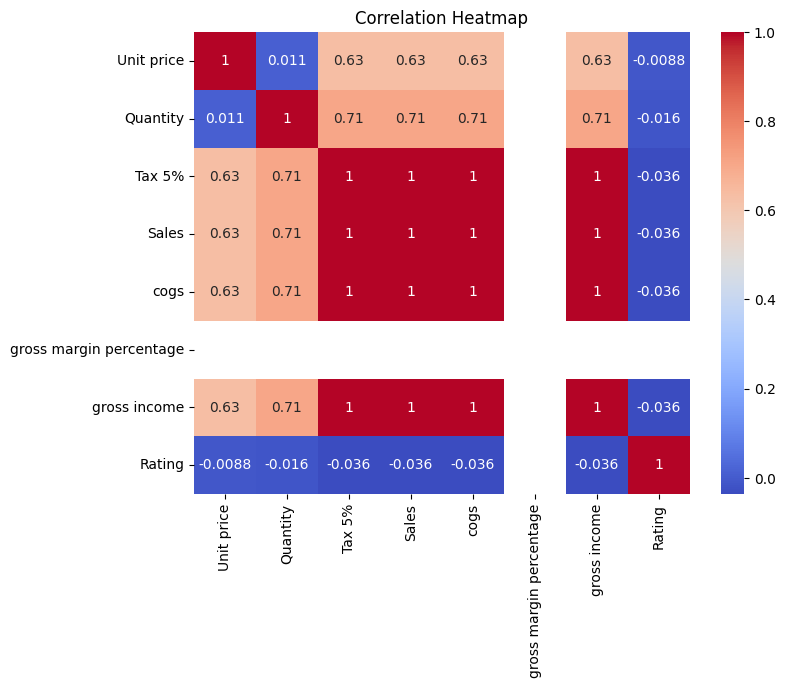

In [15]:
data_numeric = data.select_dtypes(include='number')
corr1 = data_numeric.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')



---

## Step 10: Temporal Analysis

Analyze monthly gross income trends over time.



In [16]:
print(data['Date'].head(10))

0     1/5/2019
1     3/8/2019
2     3/3/2019
3    1/27/2019
4     2/8/2019
5    3/25/2019
6    2/25/2019
7    2/24/2019
8    1/10/2019
9    2/20/2019
Name: Date, dtype: object


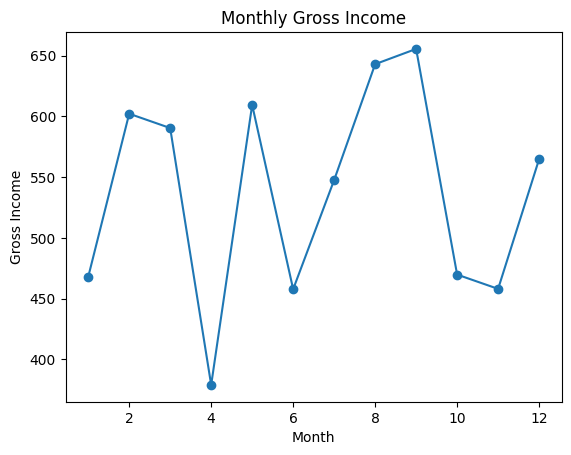

In [17]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')
data['Month'] = data['Date'].dt.month

monthly_sales = data.groupby('Month')['gross income'].sum()
monthly_sales.plot(kind='line', marker='o', title='Monthly Gross Income')
plt.ylabel('Gross Income')
plt.show()

Based on the line chart titled "Monthly Gross Income", here are the analysis insights regarding trends, performance, and volatility:
#1. High Volatility and Inconsistency 🎢
The most significant feature of the data is the extreme volatility in Gross Income from month to month.
#Sharp Swings:
There are dramatic peaks and troughs. For example, the drop from Month 3 ($\approx 590$) to Month 4 (the lowest point at $\mathbf{380}$) is an extremely sharp decline, immediately followed by a steep surge in Month 5 ($\approx 610$).
#Implication:
 This high variability suggests that the business model or external factors (like promotions, seasonality, or supply chain issues) are highly unstable. Management should investigate the specific drivers of these large month-to-month changes to gain control over revenue.
#2. Peak and Trough Performance 🎯
Identifying the best and worst performing months is crucial for operational planning.
#Absolute Peak Performance:
 Month 9 records the highest Gross Income, peaking at nearly $\mathbf{660}$. This month represents the benchmark for maximum capacity and performance.
#Absolute Trough Performance:
 Month 4 is the clear underperformer, with Gross Income bottoming out at approximately $\mathbf{380}$. This month requires immediate investigation to understand the cause of the failure.
#Secondary Peak:
 Month 5 and Month 8 are also strong performers, both exceeding the $\mathbf{640}$ mark.
#3. Annual Trend and Seasonality Patterns 📅
While the high volatility makes a simple linear trend difficult to confirm, some recurring patterns appear:
#Mid-Year Strength:
 The period from Month 5 to Month 9 (Spring/Summer/Early Autumn) generally includes the highest peak months and stronger overall performance, despite a dip in Month 6.
#End-of-Year Rebound:
  Income drops sharply after Month 9, but then shows a significant rebound in Month 12 ($\approx 565$). This could indicate a year-end boost, such as holiday shopping or year-end sales activity.
#Post-Peak Drop:
 A consistent pattern is observed after the main peak (Month 9), with a substantial drop in Month 10 and a secondary low in Month 11 ($\approx 460$).
#Recommended Next Steps
#Causal Analysis:
 Immediately link the Month 4 drop and the Month 9 peak to specific business activities (e.g., product launches, marketing campaigns, public holidays, or competitor actions).
 #Smoothing Data:
  Apply a moving average or other time-series smoothing techniques to filter out the noise and better visualize the underlying long-term trend.


---

## Step 11: Pivot Table Analysis

Aggregate data using pivot tables for deeper insights.



Customer type    Member     Normal
Branch                            
Alex           2995.037  2062.1235
Cairo          2848.770  2208.2620
Giza           3189.277  2075.8995


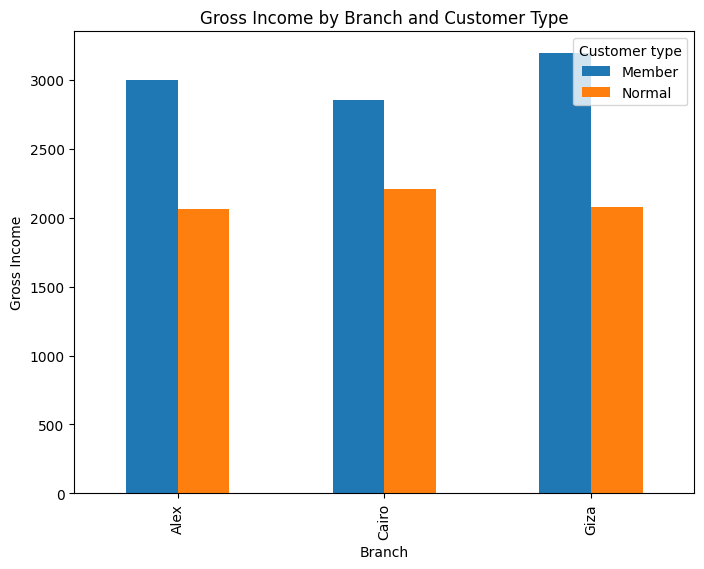

In [18]:
pivot_table = pd.pivot_table(data, values='gross income', index='Branch', columns='Customer type', aggfunc='sum')
print(pivot_table)

pivot_table.plot(kind='bar', figsize=(8,6), title='Gross Income by Branch and Customer Type')
plt.ylabel('Gross Income')
plt.show()

Here are the key  insights into revenue generation across different segments and locations:
#📊1. Member Dominance Across All Branches 👑
The most critical insight is that Member customers consistently generate significantly higher Gross Income than Normal customers in every single branch.
#Average Revenue Ratio:
 In every branch, Member income is approximately 1.3 to 1.5 times the Normal customer income.
#Strategic Focus:
This pattern strongly validates a strategy focused on member acquisition, retention, and loyalty programs. The company should continue to prioritize shifting customers from the "Normal" category to the "Member" category to maximize revenue.
#2. Branch Performance by Customer Type
While Giza is the overall best performer, the relative contribution of each customer type varies slightly by location.BranchMember Income (Approx.)Normal Income (Approx.)Performance Ratio (Member/Normal)GizaHighest ($\approx 3,200$)$\approx 2,100$Highest absolute differenceAlex$\approx 3,000$$\approx 2,050$Strong performanceCairo$\approx 2,850$$\approx 2,200$Highest Normal income
#Giza is the Overall Revenue Leader:
The Giza branch has the highest total gross income, primarily driven by its strongest Member base ($\approx 3,200$).
#Cairo's Normal Strength:
 The Cairo branch generates the highest gross income from Normal customers ($\approx 2,200$). This suggests the Cairo branch is either in a better location for walk-in traffic or excels at converting non-members.
#3. Actionable Recommendations
#Replicate Giza's Member Success:
 Investigate the Giza branch's best practices, marketing strategies, and operational procedures specifically related to their member engagement. These should be rolled out to the Alex and Cairo branches to boost their Member Gross Income.
#Analyze Cairo's Normal Base:
 Study why Cairo has the highest income from Normal customers. If it's due to high foot traffic, develop immediate in-store promotions to convert these high-volume Normal customers into high-value Members.
#Evaluate Conversion Funnel:
 The significant gap between Member and Normal income across the board confirms that Member conversion is a primary revenue lever. Management should focus on improving the Normal-to-Member conversion rate in all branches.